## Analysis of subscriptions in one country
### Results summary:
- The number of subscriptions in June (7,891) is higher than the total number of unsubscriptions (6,934) for these users.
- The average numbers of subscriptions and unsubscriptions for June are 511 and 193, respectively.
- The cumulative number of active (subscribed) users increased from the beginning of the month until the end, reaching up to 9,099 users.
- 50% of users (median) are subscribed for 6 minutes or less.
- The most used operating system is Android (72%), and the most popular service is 'ps' (38%).
- Affiliate 4 is the most profitable, delivering the most transactions, with phone operator C being slightly more frequently used.
- Most of the executed transactions failed (72%). The number of failed transactions increased, and the number of delivered transactions decreased over the given time period.
- The total revenue from delivered transactions is 75705.6.
- Phone operator C has a slightly smaller percentage of delivered transactions compared to others, other two operators have the same number of delivered and failed transactions each.
- A significant number of users (54%) did not have any successful payments at all, so it is important to focus on them to finalize their payment process.

In [447]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Loading and inspecting the data

In [448]:
# Load and inspect the data
users = pd.read_csv('data/users.csv')
transactions = pd.read_csv('data/transactions.tsv', sep='\t')

In [449]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   user_id              14825 non-null  object 
 1   subscription_date    14825 non-null  object 
 2   phone_operator       14825 non-null  object 
 3   os_name              14619 non-null  object 
 4   os_version           14617 non-null  float64
 5   affiliate            14773 non-null  object 
 6   unsubscription_date  6934 non-null   object 
 7   service              14825 non-null  object 
 8   aggregator           14825 non-null  object 
dtypes: float64(1), object(8)
memory usage: 1.0+ MB


In [450]:
users.head()

,user_id,subscription_date,phone_operator,os_name,os_version,affiliate,unsubscription_date,service,aggregator
0,4b0625b0e19a11ec8a541fcc86ad2588,2022-06-01 11:03:06.000000,C,NaN,NaN,aff_4,2022-06-01 12:23:34.000000,ps,ABC
1,4058b340e19e11ec95703f2faa3b39a3,2022-06-01 11:32:06.000000,B,Android,8.0,aff_4,NaN,gc,ABC
2,a0b80170e1b011ec8a541fcc86ad2588,2022-06-01 13:42:29.000000,C,Android,9.0,aff_4,NaN,ma,ABC
3,91299d70e1d511ec8a541fcc86ad2588,2022-06-01 18:09:04.000000,B,iOS,15.4,aff_4,2022-06-15 08:24:58.000000,ps,ABC
4,ee930990e1fa11ecb2988337303a8fef,2022-06-01 22:35:02.000000,C,Android,6.0,aff_4,NaN,ma,ABC


In [451]:
transactions.head()

,user_id,transaction_timestamp,service,phone_operator,status,pricepoint
0,ad54a2e0e16e11ec95703f2faa3b39a3,2022-06-01 05:50:48.000000,ma,C,Failed,3.6
1,f0769510e19611ecb2988337303a8fef,2022-06-01 10:38:53.000000,ps,A,Failed,3.6
2,3c7b02e0e1a911ec8a541fcc86ad2588,2022-06-01 12:50:41.000000,cl,A,Failed,3.6
3,bf9b25f0e1e111ecbaa51f9ae3f5945d,2022-06-01 19:34:40.000000,ma,A,Delivered,3.6
4,06d76e40e1fd11ec8a541fcc86ad2588,2022-06-01 22:49:27.000000,tv,B,Failed,3.6


In [452]:
transactions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62877 entries, 0 to 62876
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                62877 non-null  object 
 1   transaction_timestamp  62877 non-null  object 
 2   service                62877 non-null  object 
 3   phone_operator         62877 non-null  object 
 4   status                 62876 non-null  object 
 5   pricepoint             62877 non-null  float64
dtypes: float64(1), object(5)
memory usage: 2.9+ MB


## 2. Data Cleaning and preprocessing

In [453]:
# Correct data types
# Convert dates and timestamps to datetime type
users['subscription_date'] = pd.to_datetime(users['subscription_date'])
users['unsubscription_date'] = pd.to_datetime(users['unsubscription_date'], errors='coerce')  # It can have null values
transactions['transaction_timestamp'] = pd.to_datetime(transactions['transaction_timestamp']) 

In [454]:
# Check missing values
users.isnull().sum()

user_id                   0
subscription_date         0
phone_operator            0
os_name                 206
os_version              208
affiliate                52
unsubscription_date    7891
service                   0
aggregator                0
dtype: int64

In [455]:
users[(users.os_version.isnull())]

,user_id,subscription_date,phone_operator,os_name,os_version,affiliate,unsubscription_date,service,aggregator
0,4b0625b0e19a11ec8a541fcc86ad2588,2022-06-01 11:03:06,C,NaN,NaN,aff_4,2022-06-01 12:23:34,ps,ABC
357,d4a36160e36211eca8957b6cb3999042,2022-06-03 17:30:33,C,NaN,NaN,aff_4,2022-06-17 10:33:52,ps,ABC
399,4305b7c0e1d311ecbaa51f9ae3f5945d,2022-06-01 17:51:54,B,NaN,NaN,aff_4,2022-06-01 18:06:16,gc,ABC
671,4a675420e28b11eca8957b6cb3999042,2022-06-02 15:48:09,A,NaN,NaN,aff_4,NaT,cl,ABC
993,8b62b020e1df11ec95703f2faa3b39a3,2022-06-01 19:18:28,C,NaN,NaN,aff_4,2022-06-01 19:19:14,ps,ABC
...,...,...,...,...,...,...,...,...,...
14495,8a3f3ee0f65011ec9707d58e12d566d8,2022-06-27 19:39:16,A,NaN,NaN,aff_3,NaT,gc,ABC
14580,62ef5ed0ecd011ecbc89495b27b9c9c5,2022-06-15 17:27:32,C,NaN,NaN,aff_2,NaT,tv,ABC
14633,70d247ddaf2145a7aa0b4140c3509b13,2022-06-18 18:05:10,C,NaN,NaN,aff_4,2022-06-18 18:06:55,ma,ABC
14738,286ab770f5de11ec98339db181f14dac,2022-06-27 05:59:45,A,NaN,NaN,aff_4,2022-06-27 07:08:23,ma,ABC


In [456]:
transactions[~transactions.status.isnull()]

,user_id,transaction_timestamp,service,phone_operator,status,pricepoint
0,ad54a2e0e16e11ec95703f2faa3b39a3,2022-06-01 05:50:48,ma,C,Failed,3.6
1,f0769510e19611ecb2988337303a8fef,2022-06-01 10:38:53,ps,A,Failed,3.6
2,3c7b02e0e1a911ec8a541fcc86ad2588,2022-06-01 12:50:41,cl,A,Failed,3.6
3,bf9b25f0e1e111ecbaa51f9ae3f5945d,2022-06-01 19:34:40,ma,A,Delivered,3.6
4,06d76e40e1fd11ec8a541fcc86ad2588,2022-06-01 22:49:27,tv,B,Failed,3.6
...,...,...,...,...,...,...
62872,42c8f150e1dd11ecb2988337303a8fef,2022-07-27 05:32:32,ma,C,Failed,3.6
62873,0b54db30ece111ecbc89495b27b9c9c5,2022-07-27 05:32:32,cl,C,Failed,3.6
62874,a3f3ea70f23611ec98339db181f14dac,2022-07-27 05:32:32,ps,C,Failed,3.6
62875,4087d2f0e71711ec9af991325ed16c0b,2022-07-27 05:34:32,ma,A,Failed,3.6


Missing values part from whole dataset is small and there is no need to handle (replace) them for descriptive analysis.

In [457]:
# Outlier Detection for numerical variable ranges

# Calculate IQR
Q1 = transactions['pricepoint'].quantile(0.25)
Q3 = transactions['pricepoint'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out upper outliers
filtered_transactions = transactions[(transactions['pricepoint'] >= lower_bound) & (transactions['pricepoint'] <= upper_bound)]

In [458]:
Q1,Q3,lower_bound, upper_bound

(3.6, 3.6, 3.6, 3.6)

In [459]:
transactions.pricepoint.value_counts()

3.6        62876
12345.6        1
Name: pricepoint, dtype: int64

It appeared that all values are the same, I assume this is a base price for a service.

One extreme outlier is 12345.6. It requires clarification but I assume for this analysis that this value is most likely incorrect. There is an option to remove it or replace with 'base' price to keep the transaction other info.

In [460]:
# replace outlier with common value
transactions['pricepoint'] = transactions['pricepoint'].replace(62876, 3.6)

In [461]:
# Duplicates check in users and transactions

In [462]:
users.user_id.duplicated().sum()

0

In [463]:
transactions[transactions.duplicated(subset=['user_id', 'transaction_timestamp'], keep=False)]

,user_id,transaction_timestamp,service,phone_operator,status,pricepoint
22522,24dc7e10ee7f11ec989b6b01af70e4c0,2022-06-24 05:16:32,ma,B,Failed,3.6
22523,24dc7e10ee7f11ec989b6b01af70e4c0,2022-06-24 05:16:32,ma,B,Failed,3.6
34339,24dc7e10ee7f11ec989b6b01af70e4c0,2022-07-01 05:16:32,ma,B,Failed,3.6
34340,24dc7e10ee7f11ec989b6b01af70e4c0,2022-07-01 05:16:32,ma,B,Failed,3.6
40873,24dc7e10ee7f11ec989b6b01af70e4c0,2022-07-08 05:31:32,ma,B,Failed,3.6
40874,24dc7e10ee7f11ec989b6b01af70e4c0,2022-07-08 05:31:32,ma,B,Failed,3.6
53111,24dc7e10ee7f11ec989b6b01af70e4c0,2022-07-15 05:31:31,ma,B,Failed,3.6
53112,24dc7e10ee7f11ec989b6b01af70e4c0,2022-07-15 05:31:31,ma,B,Failed,3.6
61025,24dc7e10ee7f11ec989b6b01af70e4c0,2022-07-22 05:31:32,ma,B,Failed,3.6
61027,24dc7e10ee7f11ec989b6b01af70e4c0,2022-07-22 05:31:32,ma,B,Failed,3.6


Some transactions are duplicated in the dataset, it it needed to remove them for further analysis.

In [464]:
transactions.drop_duplicates(subset=['user_id', 'transaction_timestamp'], inplace = True)

## 3. Analysis 

### User data

In [465]:
# Show counts of subscribed and unsubsribed users 
subscribed = users['unsubscription_date'].isna().sum()
unsubscribed = len(users) - subscribed

In [466]:
subscribed, unsubscribed

(7891, 6934)

### How many subscribed and unsubscribed users are in the given time range?

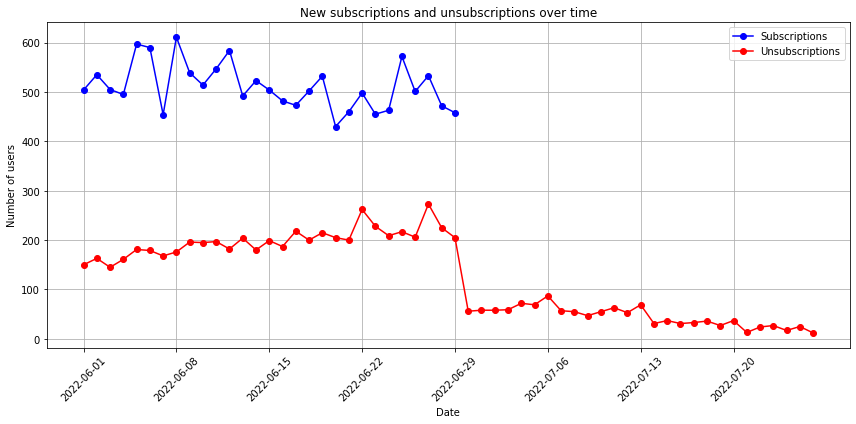

In [467]:
# Subcribed and unsubsribed users over time
# Extract just the date part
users['subscription_date_part'] = users['subscription_date'].dt.date
users['unsubscription_date_part'] = users['unsubscription_date'].dt.date

# Count number of subscriptions and unsubscriptions by day
subscriptions_daily = users.groupby('subscription_date_part').size()
unsubscriptions_daily = users.groupby('unsubscription_date_part').size()

plt.figure(figsize=(12, 6))
subscriptions_daily.plot(kind='line', color='blue', marker='o', label='Subscriptions')
unsubscriptions_daily.plot(kind='line', color='red', marker='o', label='Unsubscriptions')

start, end = users['subscription_date'].min().date(), users['unsubscription_date'].max().date()
date_range = pd.date_range(start=start, end=end, freq='7D')
plt.xticks(date_range, [d.strftime('%Y-%m-%d') for d in date_range], rotation=45)
plt.title('New subscriptions and unsubscriptions over time')
plt.xlabel('Date')
plt.ylabel('Number of users')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

Some users who subscribed in June canceled sunscription in July.

In [468]:
subscribed_users = users[users.unsubscription_date.isna()==True]

In [469]:
subscribed_users.head()

,user_id,subscription_date,phone_operator,os_name,os_version,affiliate,unsubscription_date,service,aggregator,subscription_date_part,unsubscription_date_part
1,4058b340e19e11ec95703f2faa3b39a3,2022-06-01 11:32:06,B,Android,8.0,aff_4,NaT,gc,ABC,2022-06-01,NaT
2,a0b80170e1b011ec8a541fcc86ad2588,2022-06-01 13:42:29,C,Android,9.0,aff_4,NaT,ma,ABC,2022-06-01,NaT
4,ee930990e1fa11ecb2988337303a8fef,2022-06-01 22:35:02,C,Android,6.0,aff_4,NaT,ma,ABC,2022-06-01,NaT
6,86fa07f0e26511ecb4346f30d03a03b3,2022-06-02 11:19:03,C,Android,11.0,aff_4,NaT,ma,ABC,2022-06-02,NaT
8,385eb670e2b211ecaa7033b4a0ee0e67,2022-06-02 20:26:29,C,iOS,15.0,aff_4,NaT,ma,ABC,2022-06-02,NaT


In [470]:
# Average subscriptions per day
avg_subscriptions = subscriptions_daily.mean().round()
unsubscriptions_daily.index = pd.to_datetime(unsubscriptions_daily.index)

# Average subscriptions per day for the same month as subscriptions
filtered_unsubscriptions = unsubscriptions_daily[unsubscriptions_daily.index < '2022-07-01']
avg_unsubscriptions = filtered_unsubscriptions.mean().round()
print(f"Average daily subscriptions in June: {avg_subscriptions} ")
print(f"Average daily unsubscriptions in June: {avg_unsubscriptions} ")

Average daily subscriptions in June: 511.0 
Average daily unsubscriptions in June: 193.0 


### How many active users (who are subscribed) are on a selected day?

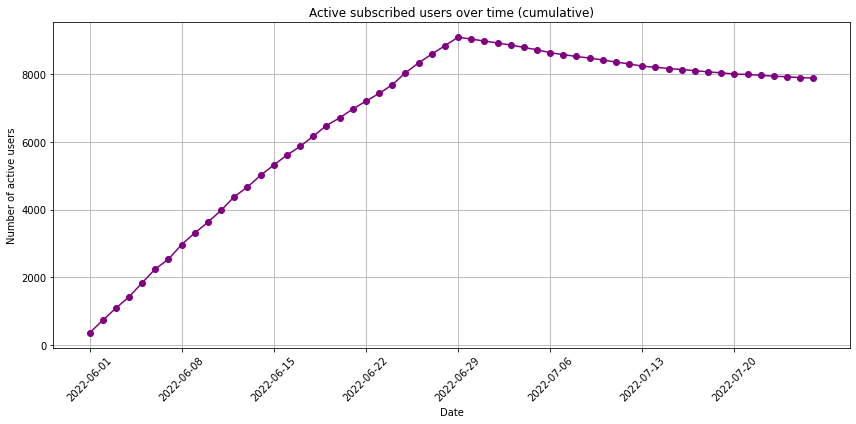

In [471]:
# Calculate cumulative active users (subscribed - unsubscribed)

df_active_users = pd.DataFrame(
    index=pd.date_range(start=users['subscription_date_part'].min(), 
     end=users.dropna(subset=['unsubscription_date_part']).unsubscription_date_part.max()))

# Counting the number of subscriptions and unsubscriptions each day
subscriptions_daily = users.groupby('subscription_date_part').size().cumsum()
unsubscriptions_daily = users.groupby('unsubscription_date_part').size().cumsum()

df_active_users['Subscriptions'] = subscriptions_daily
df_active_users['Unsubscriptions'] = unsubscriptions_daily

# Fill NaN values with the previous value for cumulative calculations
df_active_users.ffill(inplace=True)

# Make index as a column for labelling x axes
df_active_users['Active users'] = df_active_users['Subscriptions'] - df_active_users['Unsubscriptions']
df_active_users= df_active_users.reset_index().rename(columns={'index': 'activity_date'})

plt.figure(figsize=(12, 6))
plt.plot(df_active_users['activity_date'], df_active_users['Active users'], color='purple', marker='o')
plt.title('Active subscribed users over time (cumulative)')
plt.xlabel('Date')
plt.ylabel('Number of active users')
plt.xticks(date_range, [d.strftime('%Y-%m-%d') for d in date_range], rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

In [472]:
# Maximum number of active users in June
df_active_users['Active users'].max()

9099.0

### How much time does the subscription last?

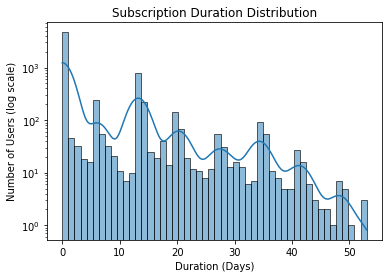

In [473]:
# Subscription Duration
users['subscription_duration'] = (users['unsubscription_date'] - users['subscription_date']).dt.days
users['subscription_duration_hours'] = (users['unsubscription_date'] - users['subscription_date']).dt.total_seconds() / 3600

sns.histplot(users['subscription_duration'].dropna(), bins=50, kde=True)
plt.yscale('log')  
plt.title('Subscription Duration Distribution')
plt.xlabel('Duration (Days)')
plt.ylabel('Number of Users (log scale)')
plt.show()

In [474]:
# Show percentiles and median in subscription duration hours
percentiles = [25, 50, 75, 98]
for p in percentiles:
    percentile_value_hours = users['subscription_duration_hours'].dropna().quantile(p / 100).round(2)
    print(f"{p}th percentile of subscription duration: {percentile_value_hours} hours")

25th percentile of subscription duration: 0.03 hours
50th percentile of subscription duration: 0.09 hours
75th percentile of subscription duration: 320.88 hours
98th percentile of subscription duration: 844.55 hours


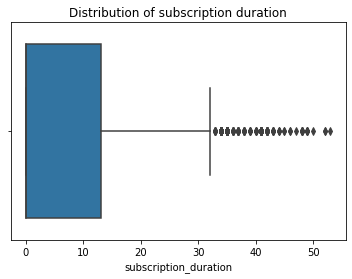

In [492]:
# Additional boxplot to see these values
sns.boxplot(x=users['subscription_duration'].dropna())
plt.title('Distribution of subscription duration')
plt.show()

### What OS do users use?

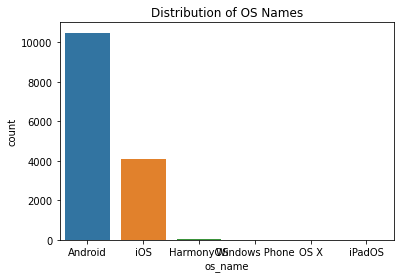

In [476]:
# OS Name distribution
sns.countplot(x='os_name', data=users)
plt.title('Distribution of OS Names')
plt.show()

In [477]:
# Show percentage of each category
(users.os_name.value_counts(normalize=True) * 100).round()

Android          72.0
iOS              28.0
HarmonyOS         0.0
iPadOS            0.0
Windows Phone     0.0
OS X              0.0
Name: os_name, dtype: float64

In [478]:
# OS name and version
# Grouping by os_name and os_version, then counting users
grouped_users = users.groupby(['os_name', 'os_version']).size().reset_index(name='user_count')
sorted_grouped_users = grouped_users.sort_values(by='user_count', ascending=False)

# Top 10 OS with versions
sorted_grouped_users.head(10)

,os_name,os_version,user_count
12,Android,11.0,3534
11,Android,10.0,3065
46,iOS,15.5,2597
13,Android,12.0,1685
10,Android,9.0,1109
45,iOS,15.4,568
8,Android,8.0,341
9,Android,8.1,277
40,iOS,14.8,203
24,iOS,12.5,137


### What is the most popular phone operator?

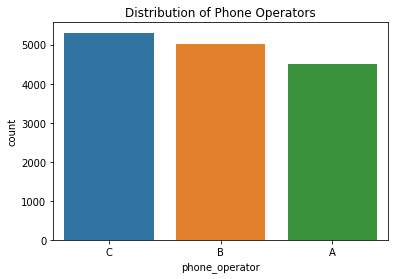

In [479]:
# Phone operator distribution
sns.countplot(x='phone_operator', data=users)
plt.title('Distribution of Phone Operators')
plt.show()

In [480]:
# Show percentage of each category
(users.phone_operator.value_counts(normalize=True) * 100).round()

C    36.0
B    34.0
A    30.0
Name: phone_operator, dtype: float64

### What is the most popular service?

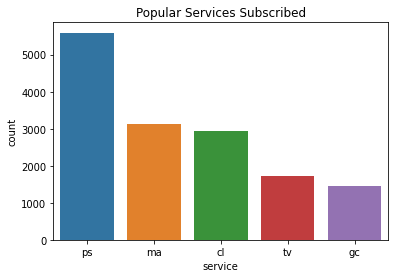

In [481]:
# Service distribution
sns.countplot(x='service', data=users, order= users['service'].value_counts().index)
plt.title('Popular Services Subscribed')
plt.show()

In [482]:
# show percentage of each category
(users.service.value_counts(normalize=True) * 100).round()

ps    38.0
ma    21.0
cl    20.0
tv    12.0
gc    10.0
Name: service, dtype: float64

### How many users are from each affiliate and phone operators did they use?

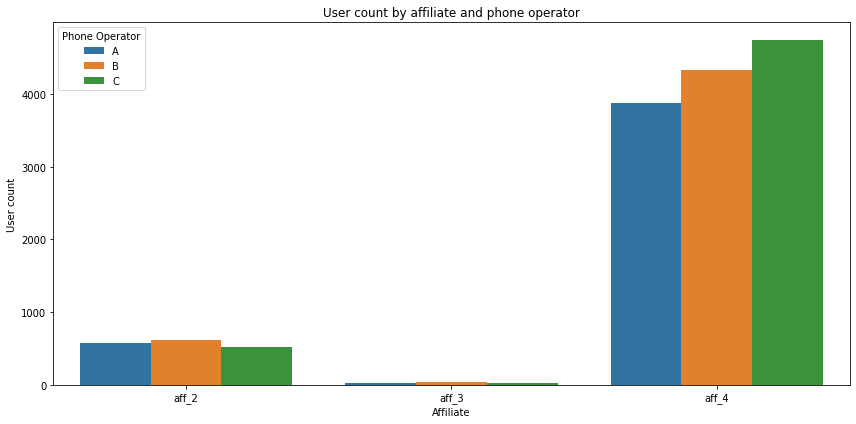

In [483]:
# Affiliate effectivnes and usage of phone operators
grouped_data = users.groupby(['phone_operator', 'affiliate']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))
sns.barplot(x='affiliate', y='count', hue='phone_operator', data=grouped_data, order = grouped_data['affiliate'].value_counts().index)
plt.title('User count by affiliate and phone operator')
plt.xlabel('Affiliate')
plt.ylabel('User count')
plt.legend(title='Phone Operator')
plt.tight_layout()
plt.show()

### Transactions data

### How many successful transactions were executed?

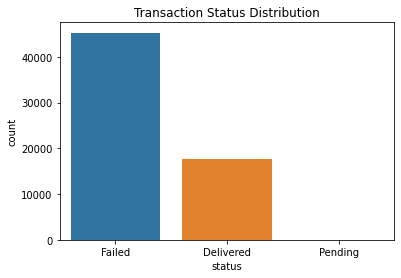

In [484]:
# Transaction status distribution
sns.countplot(x='status', data=transactions)
plt.title('Transaction Status Distribution')
plt.show()

In [485]:
# Distribution in percents
(transactions.status.value_counts(normalize=True) * 100).round()

Failed       72.0
Delivered    28.0
Pending       0.0
Name: status, dtype: float64

In [486]:
transactions.status.value_counts().round()

Failed       45268
Delivered    17601
Pending          2
Name: status, dtype: int64

### How many transactions happened on each date and with what status?

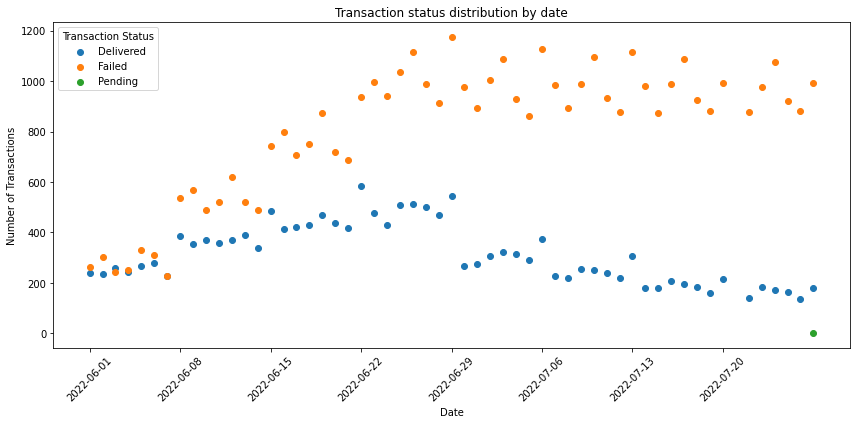

In [487]:
# Transaction status by time
# Create date column
transactions['transaction_date'] = pd.to_datetime(transactions['transaction_timestamp']).dt.date

# Group by transaction date and status
grouped_transactions = transactions.groupby(['transaction_date', 'status']).size().reset_index(name='count')

plt.figure(figsize=(12, 6))

statuses = grouped_transactions['status'].unique()
for status in statuses:
    subset = grouped_transactions[grouped_transactions['status'] == status]
    plt.scatter(subset['transaction_date'], subset['count'], label=status)

plt.title('Transaction status distribution by date')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(date_range, [d.strftime('%Y-%m-%d') for d in date_range], rotation=45)
plt.legend(title='Transaction Status')
plt.tight_layout()
plt.show()

In [488]:
# Revenue analysis
delivered_transactions = transactions[transactions['status'] == 'Delivered']
total_revenue = delivered_transactions['pricepoint'].sum().round(2)
print(f"Revenue from delivered transactions: {total_revenue}")

Revenue from delivered transactions: 75705.6


### Which affiliates are leading to more successful transactions?

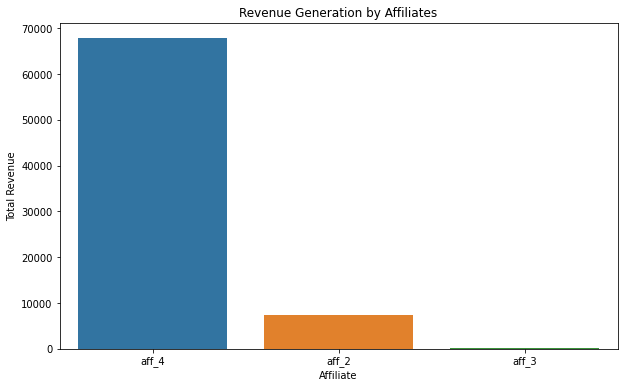

In [489]:
# Merging users and transactions on user_id
merged_data = pd.merge(users, transactions, on='user_id', how='inner')

# Focus on successful transactions only
successful_transactions = merged_data[merged_data['status'] == 'Delivered']

# Aggregate data to calculate total revenue per affiliate
affiliate_revenue = successful_transactions.groupby('affiliate')['pricepoint'].sum().reset_index()

# Sort the results for better visualization
affiliate_revenue = affiliate_revenue.sort_values(by='pricepoint', ascending=False)

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x='affiliate', y='pricepoint', data=affiliate_revenue)
plt.title('Revenue Generation by Affiliates')
plt.xlabel('Affiliate')
plt.ylabel('Total Revenue')
plt.show()

### Is there a correlation between phone opertator and transaction success?

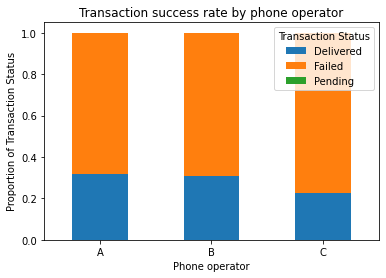

In [490]:
# Correlation between phone opertator and transaction success
os_transaction_success = transactions.groupby(['phone_operator', 'status']).size().unstack().fillna(0)

# Normalize the transaction counts by OS name
os_transaction_success_normalized = os_transaction_success.div(os_transaction_success.sum(axis=1), axis=0)

# Plotting
os_transaction_success_normalized.plot(kind='bar', stacked=True)
plt.xticks(rotation = 0)
plt.title('Transaction success rate by phone operator')
plt.xlabel('Phone operator')
plt.ylabel('Proportion of Transaction Status')
plt.legend(title='Transaction Status')
plt.show()

### How may users did not have any succesful transactions?

In [491]:
# Sort transactions by user_id and transaction timestamp
merged_data_sorted = merged_data.sort_values(by=['user_id', 'transaction_timestamp'])

# Group by user_id and get the last transaction status
final_transaction_status = merged_data_sorted.groupby('user_id')['status'].last()

# Users with at least one successful final transaction
successful_final_users = final_transaction_status[final_transaction_status == 'Delivered'].index

# Users with only failed transactions
failed_transactions_only_users = final_transaction_status[~final_transaction_status.index.isin(successful_final_users)].index

# Count the number of users in each group
num_successful_final_users = len(successful_final_users)
num_failed_transactions_only_users = len(failed_transactions_only_users)
percent_failed = round(num_failed_transactions_only_users * 100/(num_failed_transactions_only_users + num_successful_final_users))

print(f"Number of users with at least one successful final transaction: {num_successful_final_users}")
print(f"Number of users with only failed transactions: {num_failed_transactions_only_users}")
print(f"Percent of only failed transactions: {percent_failed} %")


Number of users with at least one successful final transaction: 6832
Number of users with only failed transactions: 7993
Percent of only failed transactions: 54 %
